# includes

In [82]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import decomposition

import matplotlib.pyplot as plt

# Задание 1

In [83]:
data_frame_1 = pd.DataFrame({
    "a1": [4.0, 2.5, 3.5, 2.0],
    "a2": [2.9, 1.0, 4.0, 2.1]
})
data_frame_1

,a1,a2
0,4.0,2.9
1,2.5,1.0
2,3.5,4.0
3,2.0,2.1


In [84]:
def kernel(X, Y):
    return np.linalg.norm(X - Y) ** 2


In [85]:
data_1 = data_frame_1.to_numpy()
kernel_matrix = [[kernel(x1, x2) for x2 in data_1] for x1 in data_1]
pd.DataFrame(kernel_matrix)

,0,1,2,3
0,0.00,5.86,1.46,4.64
1,5.86,0.00,10.00,1.46
2,1.46,10.00,0.00,5.86
3,4.64,1.46,5.86,0.00


# Задание 2

In [86]:
data_frame_2 = pd.DataFrame({
    "a1": [  8,  0,  10,  10, 2],
    "a2": [-20, -1, -19, -20, 0]
})
data_frame_2

,a1,a2
0,8,-20
1,0,-1
2,10,-19
3,10,-20
4,2,0


## subtask 1

In [87]:
mean_2 = data_frame_2.mean()
pd.DataFrame(mean_2, columns=["mean"]).T

,a1,a2
mean,6.0,-12.0


In [88]:
cov_2 = data_frame_2.cov()
cov_2

,a1,a2
a1,22.0,-47.5
a2,-47.5,110.5


## subtask 2

$Mv=\lambda v$, where $v$ - eigenvector, $\lambda$ - eigenvalue
$$
\begin{vmatrix*}[l]
22 - \lambda & -47.5 \\
-47.5 & 110.5 - \lambda \\
\end{vmatrix*}
= \lambda^{2} - 132.5\lambda + 2431 - 2256.25 = \\ = \lambda^{2} - 132.5\lambda - 174.75 = 0 \\

$$

$\lambda_{1}\approx131.2 ; \\ \lambda_{2}\approx1.3$

In [89]:
vals, vecs = np.linalg.eig(cov_2.to_numpy())

idx = vals.argsort()[::-1]
vals = vals[idx]
vecs = vecs[:, idx]

pd.DataFrame(vecs, columns=vals, index=["x", "y"]).T

,x,y
131.167736,0.398979,-0.916960
1.332264,-0.916960,-0.398979


## subtask 3


$corr(X, Y) = \frac{cov(X, Y)}{\sigma_{X}\sigma_{Y}}$

In [90]:
data_frame_2.corr()

,a1,a2
a1,1.000000,-0.963388
a2,-0.963388,1.000000


# Задание 3

## subtask 1

In [91]:
def proj(of, onto):
    return np.dot(of, onto) / np.dot(onto, onto)

data_frame_3 = pd.DataFrame()
data_frame_3["a1"] = data_frame_2["a1"].transform(lambda x: x - mean_2["a1"])
data_frame_3["a2"] = data_frame_2["a2"].transform(lambda x: x - mean_2["a2"])

principal_1 = np.array(list(map(lambda x: proj(x, vecs[0]), data_frame_3.to_numpy())))
principal_2 = np.array(list(map(lambda x: proj(x, vecs[1]), data_frame_3.to_numpy())))

pd.DataFrame({
    "P1": principal_1,
    "P2": principal_2
}).T.round(3)

,0,1,2,3,4
P1,8.134,-12.480,8.015,8.932,-12.599
P2,1.358,1.113,-0.875,-0.476,-1.120


## subtask 2

In [92]:
pd.DataFrame({
    "P1": [vals[0] / vals.sum()],
    "P2": [vals[1] / vals.sum()]
}, index=["variance proportion"])

,P1,P2
variance proportion,0.989945,0.010055


## subtask 3

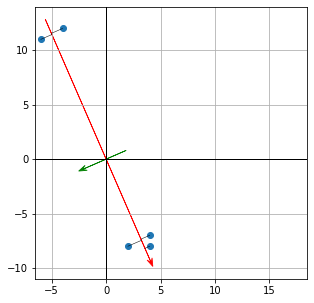

In [93]:
def draw_arrow(xy1, xy2, color="k"):
    dx = xy2[0] - xy1[0]
    dy = xy2[1] - xy1[1]

    plt.arrow(xy1[0], xy1[1], dx, dy, color=color, linewidth=0.8, clip_on=False, head_width=0.5, overhang=0.5)

plt.figure(figsize=[5, 5])
plt.grid(True, "both")
plt.axhline(y=0, color="k", linewidth="1")
plt.axvline(x=0, color="k", linewidth="1")

plt.scatter(data_frame_3["a1"], data_frame_3["a2"])
draw_arrow(-vecs[0] * 14, vecs[0] * 10, color="r")
draw_arrow(-vecs.T[1] * 2, vecs.T[1] * 2, color="g")

for index, point in enumerate(data_frame_3.to_numpy()):
    line = np.array([
        vecs[0] * principal_1[index],
        point,
        # vecs[1] * principal_2[index]
    ]).T
    plt.plot(line[0], line[1], linewidth="0.5", color="k")

plt.axis("square")

plt.show()